Coded verified and tested by: Mustafa Hassan

Author: josephlee94

Link: https://github.com/josephlee94/intuitive-deep-learning

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


The label is: [6]


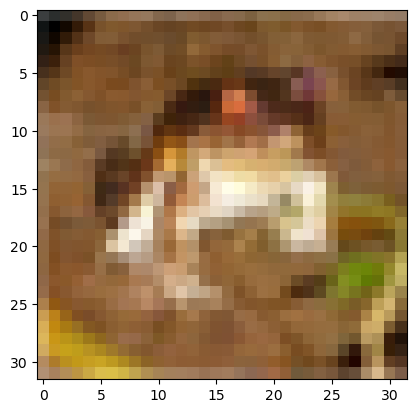

In [4]:
img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

The label is: [9]


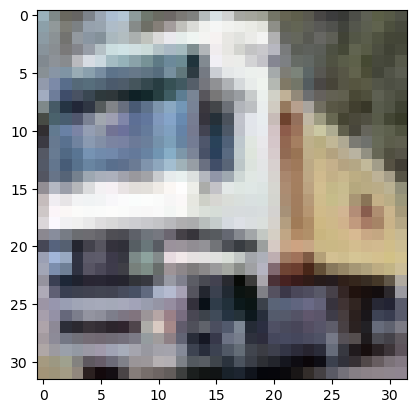

In [5]:
img = plt.imshow(x_train[1])
print('The label is:', y_train[1])

In [6]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from skimage.transform import resize

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)


Epoch 1/20
1250/1250 [==============================] - 118s 93ms/step - loss: 1.5653 - accuracy: 0.4237 - val_loss: 1.1721 - val_accuracy: 0.5829
Epoch 2/20
1250/1250 [==============================] - 114s 91ms/step - loss: 1.1546 - accuracy: 0.5852 - val_loss: 1.0007 - val_accuracy: 0.6428
Epoch 3/20
1250/1250 [==============================] - 114s 91ms/step - loss: 1.0088 - accuracy: 0.6457 - val_loss: 0.8981 - val_accuracy: 0.6818
Epoch 4/20
1250/1250 [==============================] - 113s 90ms/step - loss: 0.9116 - accuracy: 0.6795 - val_loss: 0.8127 - val_accuracy: 0.7169
Epoch 5/20
1250/1250 [==============================] - 124s 99ms/step - loss: 0.8401 - accuracy: 0.7054 - val_loss: 0.7773 - val_accuracy: 0.7265
Epoch 6/20
1250/1250 [==============================] - 118s 94ms/step - loss: 0.7788 - accuracy: 0.7274 - val_loss: 0.7315 - val_accuracy: 0.7467
Epoch 7/20
1250/1250 [==============================] - 118s 94ms/step - loss: 0.7327 - accuracy: 0.7424 - val_loss: 0

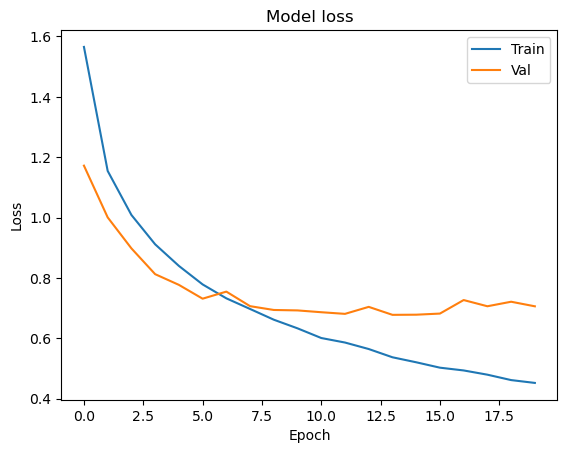

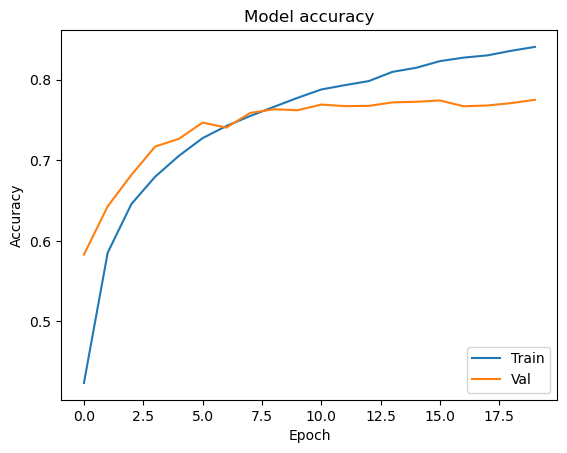

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.7241 - accuracy: 0.7722


0.7721999883651733

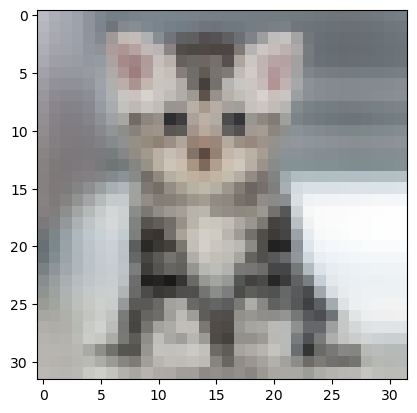

In [12]:
model.save('my_cifar10_model.h5')

my_image = plt.imread("cat.jpg")

my_image_resized = resize(my_image, (32,32,3))

img = plt.imshow(my_image_resized)

In [13]:
probabilities = model.predict(np.array( [my_image_resized,] ))

probabilities

1/1 [==============================] - 0s 145ms/step


array([[5.5820641e-05, 1.4770408e-08, 6.3651428e-03, 1.4267303e-01,
        6.2455732e-02, 6.5605092e-01, 1.0587518e-03, 1.3130616e-01,
        2.0017256e-05, 1.4473767e-05]], dtype=float32)

In [14]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.6560509
Second most likely class: cat -- Probability: 0.14267303
Third most likely class: horse -- Probability: 0.13130616
Fourth most likely class: deer -- Probability: 0.062455732
Fifth most likely class: bird -- Probability: 0.0063651428
